In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Load the dataset
df = pd.read_csv('/content/heart.csv')

In [ ]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Check for missing values
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


# Data Visualization

Text(0.5, 1.0, 'Age')

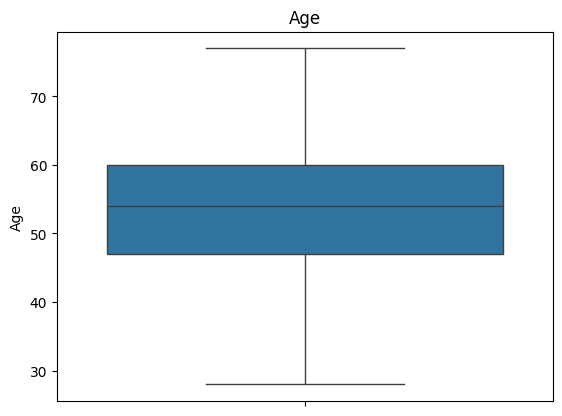

In [ ]:
sns.boxplot(df['Age'])
plt.title('Age')

Text(0.5, 1.0, 'Gender')

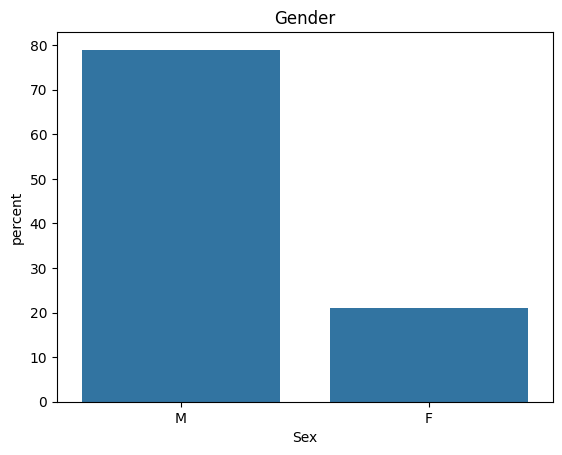

In [ ]:
sns.countplot(x=df['Sex'], stat='percent')
plt.title('Gender')

Text(0.5, 1.0, 'Chest Pain')

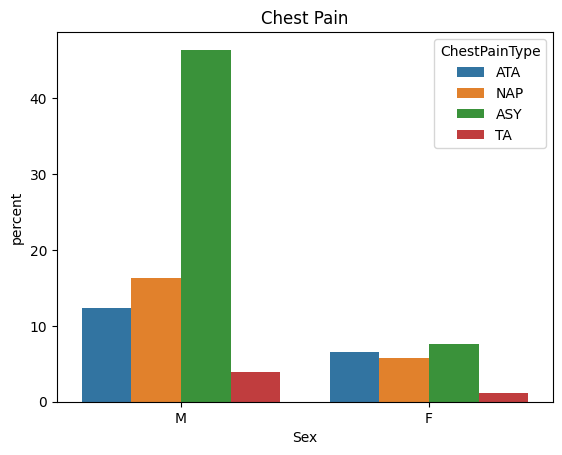

In [ ]:
sns.countplot(df, x="Sex", hue="ChestPainType", stat="percent")
plt.title('Chest Pain')

Text(0.5, 1.0, 'Resting Blood Pressure')

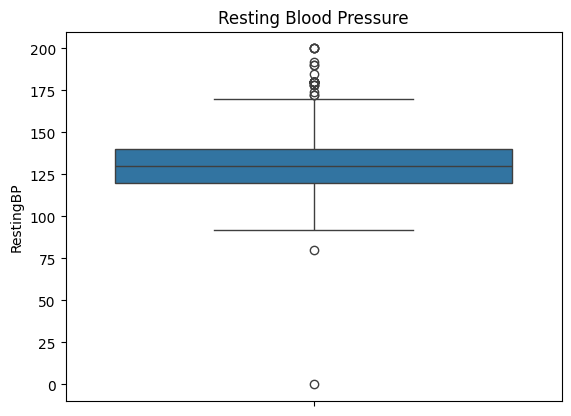

In [ ]:
sns.boxplot(df['RestingBP'])
plt.title('Resting Blood Pressure')

Text(0.5, 1.0, 'Cholesterol')

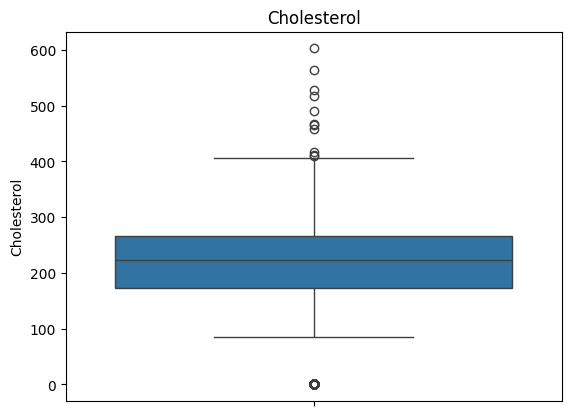

In [ ]:
sns.boxplot(df['Cholesterol'])
plt.title('Cholesterol')

Text(0.5, 1.0, 'Fasting Blood Sugar')

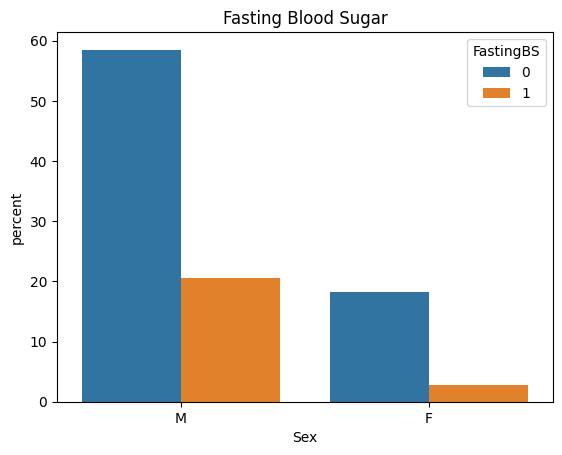

In [ ]:
sns.countplot(df, x="Sex", hue="FastingBS", stat="percent")
plt.title('Fasting Blood Sugar')

Text(0.5, 1.0, 'Resting Electrocardiographic Results')

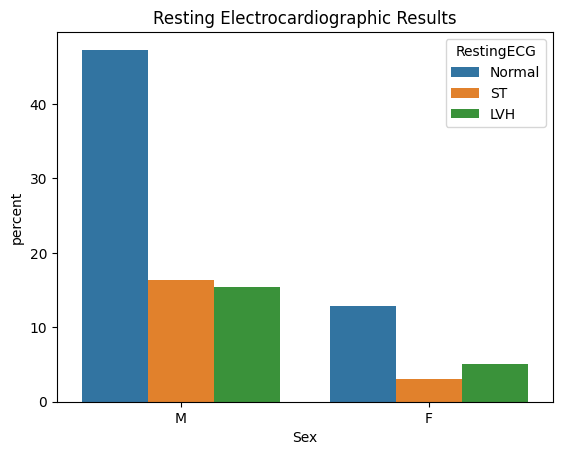

In [ ]:
sns.countplot(df, x="Sex", hue="RestingECG", stat="percent")
plt.title('Resting Electrocardiographic Results')

Text(0.5, 1.0, 'Maximum Heart Rate')

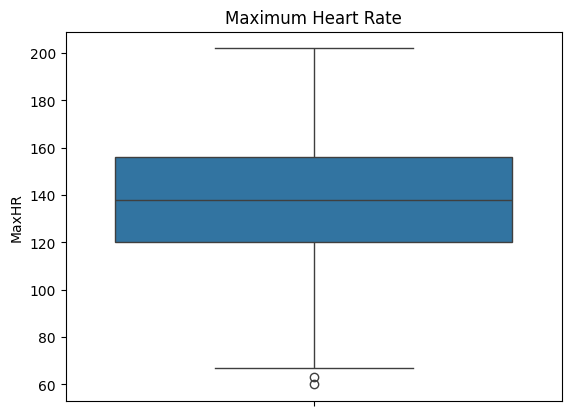

In [ ]:
sns.boxplot(df['MaxHR'])
plt.title('Maximum Heart Rate')

Text(0.5, 1.0, 'Exercise Induced Angina')

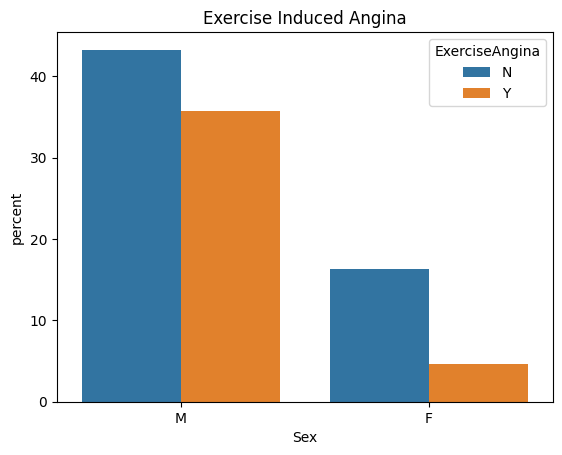

In [ ]:
sns.countplot(df, x="Sex", hue="ExerciseAngina", stat="percent")
plt.title('Exercise Induced Angina')

Text(0.5, 1.0, 'Oldpeak')

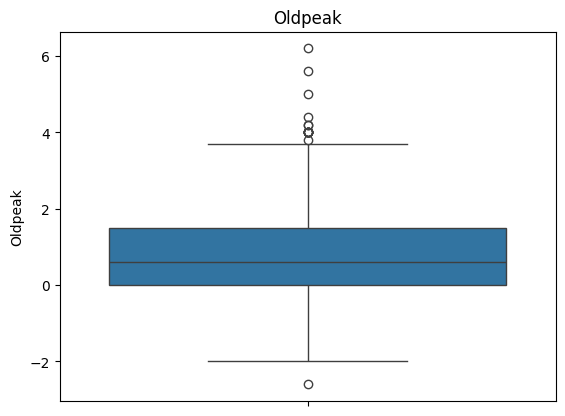

In [ ]:
sns.boxplot(df['Oldpeak'])
plt.title('Oldpeak')

Text(0.5, 1.0, 'ST Slope')

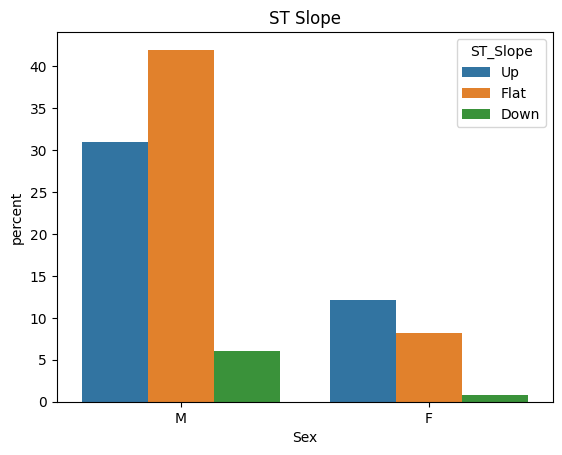

In [ ]:
sns.countplot(df, x="Sex", hue="ST_Slope", stat="percent")
plt.title('ST Slope')

Text(0.5, 1.0, 'Heart Disease')

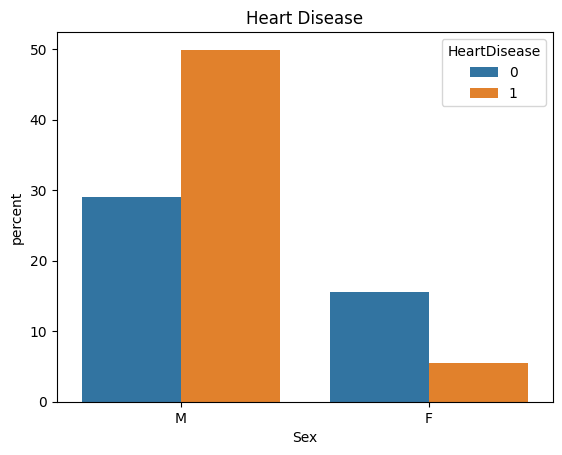

In [ ]:
sns.countplot(df, x="Sex", hue="HeartDisease", stat="percent")
plt.title('Heart Disease')

# Removing object data type using **OneHotEncoding**

In [ ]:
categorical_data = df.select_dtypes(include = ['object']).columns.tolist()
categorical_data

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
oneHt = OneHotEncoder(sparse_output = False)

In [ ]:
apply = oneHt.fit_transform(df[categorical_data])
apply

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [ ]:
ch_show = pd.DataFrame(apply ,columns = oneHt.get_feature_names_out(categorical_data))
ch_show

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
new = pd.concat([ch_show, df], axis=1)
new

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,...,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,ATA,130,283,0,ST,98,N,0.0,Up,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
final = new.drop(categorical_data, axis=1)
final

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,...,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,40,140,289,0,172,0.0,0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,49,160,180,0,156,1.0,1
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,37,130,283,0,98,0.0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,48,138,214,0,108,1.5,1
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,45,110,264,0,132,1.2,1
914,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,68,144,193,1,141,3.4,1
915,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,57,130,131,0,115,1.2,1
916,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,57,130,236,0,174,0.0,1


In [ ]:
final.isnull().sum()

Sex_F                0
Sex_M                0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_LVH       0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_N     0
ExerciseAngina_Y     0
ST_Slope_Down        0
ST_Slope_Flat        0
ST_Slope_Up          0
Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
dtype: int64

In [ ]:
df = final

In [ ]:
df.corr()

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,...,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Sex_F,1.000000,-1.000000,-0.183876,0.161522,0.066486,0.004031,0.049518,0.010634,-0.063715,0.190664,...,-0.066036,-0.116077,0.150942,-0.055750,-0.005133,0.200092,-0.120076,0.189186,-0.105734,-0.305445
Sex_M,-1.000000,1.000000,0.183876,-0.161522,-0.066486,-0.004031,-0.049518,-0.010634,0.063715,-0.190664,...,0.066036,0.116077,-0.150942,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445
ChestPainType_ASY,-0.183876,0.183876,1.000000,-0.522432,-0.577670,-0.249003,0.002289,-0.063606,0.076438,-0.430034,...,0.103407,0.303645,-0.359443,0.166607,0.048824,-0.120531,0.131176,-0.354963,0.280026,0.516716
ChestPainType_ATA,0.161522,-0.161522,-0.522432,1.000000,-0.256767,-0.110679,-0.085791,0.107941,-0.046111,0.300365,...,-0.097754,-0.304667,0.357588,-0.218165,-0.046153,0.150954,-0.140514,0.253735,-0.262124,-0.401924
ChestPainType_NAP,0.066486,-0.066486,-0.577670,-0.256767,1.000000,-0.122381,0.035299,0.005010,-0.042236,0.166030,...,-0.040816,-0.072031,0.093583,-0.011335,-0.041348,-0.006634,-0.039249,0.134580,-0.106212,-0.212964
ChestPainType_TA,0.004031,-0.004031,-0.249003,-0.110679,-0.122381,1.000000,0.081407,-0.057719,-0.011611,0.128105,...,0.016651,-0.010486,0.002087,0.032042,0.049855,0.017365,0.026885,0.100025,0.032231,-0.054790
RestingECG_LVH,0.049518,-0.049518,0.002289,-0.085791,0.035299,0.081407,1.000000,-0.623227,-0.248892,0.016382,...,0.043755,0.015091,-0.037582,0.145727,0.053166,0.177077,-0.011656,0.125793,0.086794,0.010670
RestingECG_Normal,0.010634,-0.010634,-0.063606,0.107941,0.005010,-0.057719,-0.623227,1.000000,-0.602314,0.072924,...,-0.060564,-0.047172,0.078563,-0.230566,-0.116851,-0.038470,-0.093028,0.023801,-0.116719,-0.091580
RestingECG_ST,-0.063715,0.063715,0.076438,-0.046111,-0.042236,-0.011611,-0.248892,-0.602314,1.000000,-0.107036,...,0.030345,0.043017,-0.058936,0.136798,0.090447,-0.133106,0.127110,-0.157879,0.055958,0.102527
ExerciseAngina_N,0.190664,-0.190664,-0.430034,0.300365,0.166030,0.128105,0.016382,0.072924,-0.107036,1.000000,...,-0.136439,-0.382237,0.455676,-0.215793,-0.155101,0.034166,-0.060451,0.370425,-0.408752,-0.494282


<Axes: >

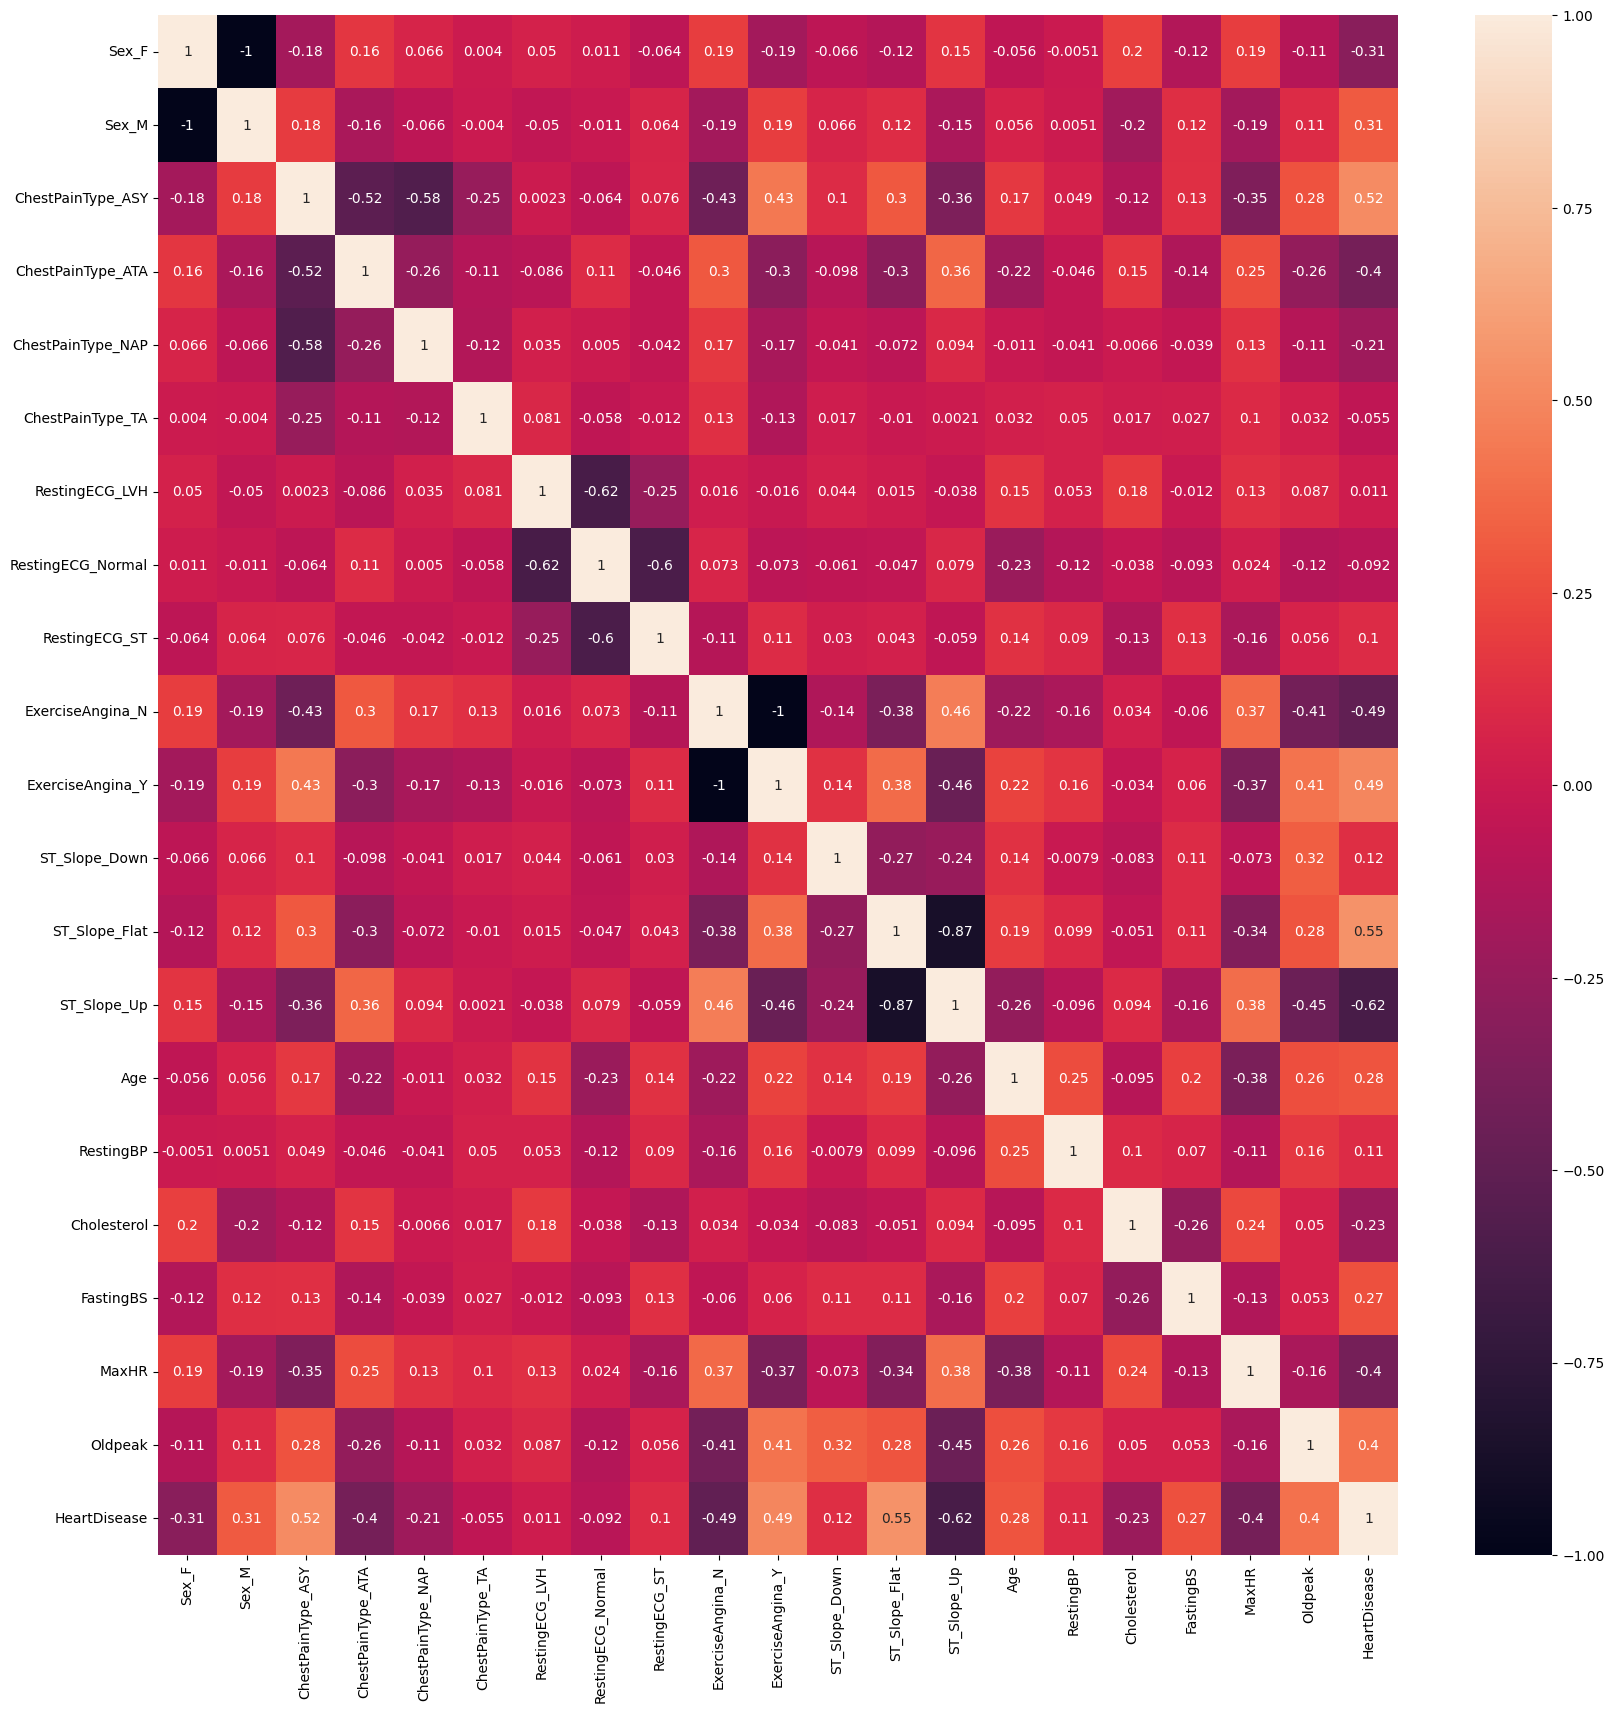

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

# Spliting the dataset

In [ ]:
# Split data into features and target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(642, 20)

In [ ]:
X_test.shape

(276, 20)

In [ ]:
y_train.shape

(642,)

In [ ]:
y_test.shape

(276,)

# Random Forest Model

In [ ]:
# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred_rf = model.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", (accuracy_score(y_test, y_pred_rf))*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 88.04347826086956
Confusion Matrix:
 [[ 99  13]
 [ 20 144]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       112
           1       0.92      0.88      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



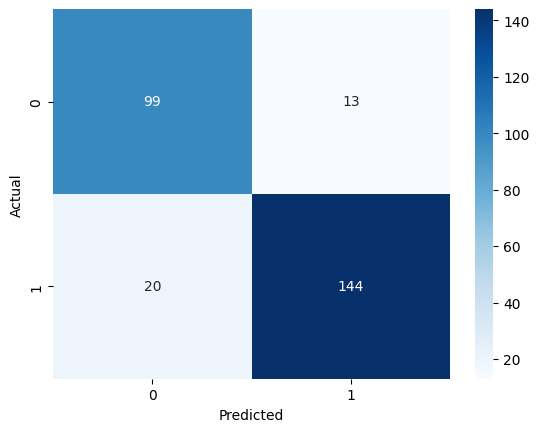

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVC Model

In [ ]:
from sklearn.svm import SVC #Support vector column

In [ ]:
svm_model = SVC(kernel= 'linear')
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred_svm=svm_model.predict(X_test)

In [ ]:
print("Accuracy:", (accuracy_score(y_test, y_pred_svm))*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy: 87.31884057971014
Confusion Matrix:
 [[ 99  13]
 [ 22 142]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276



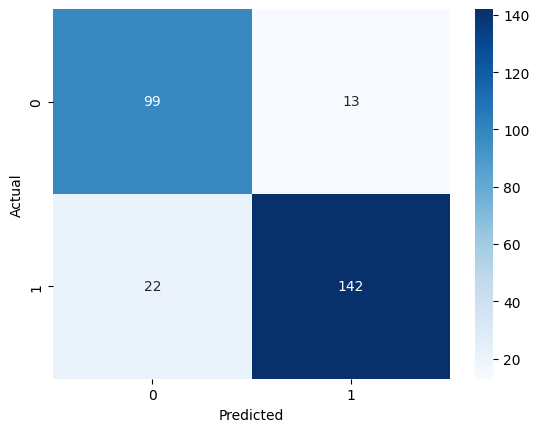

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression()
logi.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_lr = logi.predict(X_test)

In [ ]:
print("Accuracy:", (accuracy_score(y_test, y_pred_lr))*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy: 88.40579710144928
Confusion Matrix:
 [[100  12]
 [ 20 144]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       112
           1       0.92      0.88      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.88      0.88       276



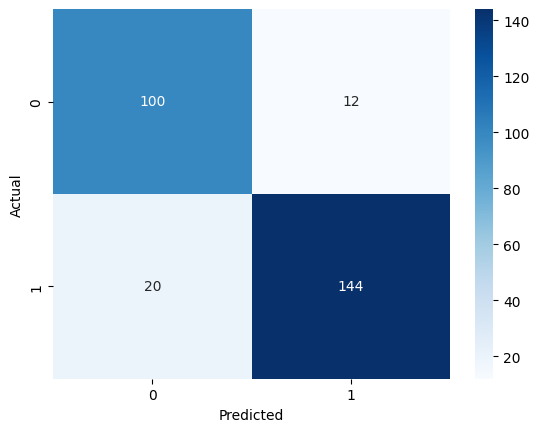

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

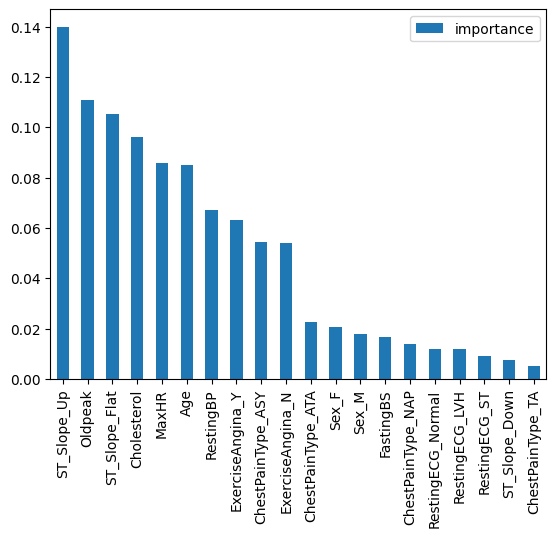

In [ ]:
# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
# Plot feature importances
feature_importances.plot(kind='bar')
plt.show()


# Testing the real-world datset

In [ ]:
patient_dataset = pd.read_csv('/content/heart_patient.csv')

In [ ]:
predicted_data_svm = svm_model.predict(patient_dataset)
predicted_data_svm

array([0])

In [ ]:
predicted_data_rf = model.predict(patient_dataset)
predicted_data_rf

array([0])

In [ ]:
predicted_data_lr = logi.predict(patient_dataset)
predicted_data_lr

array([0])

In [ ]:
if predicted_data_lr[0]==0:
  print("Logistic Regression - Normal (No Heart Disease)")
else:
  print("Logistic Regression - Heart Disease")

if predicted_data_rf[0]==0:
  print("Random Forset - Normal (No Heart Disease)")
else:
  print("Random Forset - Heart Disease")

if predicted_data_svm[0]==0:
  print("SVM - Normal (No Heart Disease)")
else:
  print("SVM - Heart Disease")


Logistic Regression - Normal (No Heart Disease)
Random Forset - Normal (No Heart Disease)
SVM - Normal (No Heart Disease)


# **Conculsion**


*   Overall all models gave good accuracy score.
*   Logistic Regression & Support vector machine has the highest score amongst
  the 3 algorithms.
*   All three models were able to predict whether the patient has heart desiease or not in the given real-world patient dataset.






